In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [34]:
data=pd.read_csv("Social_Network_Ads.csv")
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [35]:
le = LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])
print(data["Gender"].head())

0    1
1    1
2    0
3    0
4    1
Name: Gender, dtype: int64


In [36]:
X = data[["Gender","Age","EstimatedSalary"]]
Y = data["Purchased"]

In [37]:
print(X.head())
print(Y.head())

   Gender  Age  EstimatedSalary
0       1   19            19000
1       1   35            20000
2       0   26            43000
3       0   27            57000
4       1   19            76000
0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [39]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
svm=SVC(kernel='linear',random_state=0)
svm.fit(X_train,Y_train)
y_pred=svm.predict(X_test)

<Axes: >

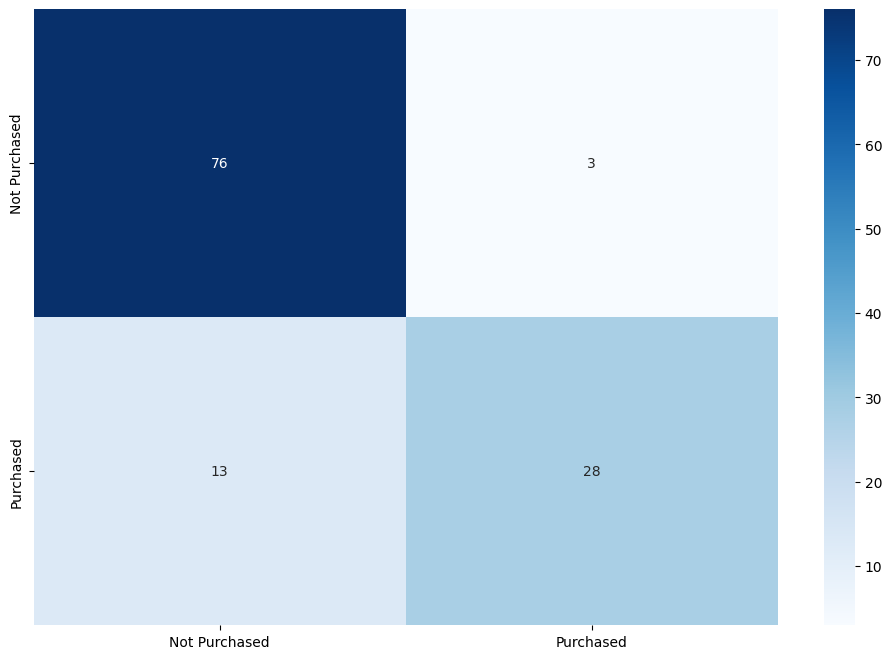

In [43]:
cm=confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True,xticklabels=(["Not Purchased","Purchased"]),yticklabels=(["Not Purchased","Purchased"]),cmap='Blues')


In [47]:
print("Precision Score" ,precision_score(Y_test,y_pred,average='macro'))

Precision Score 0.8785791953606379
